# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

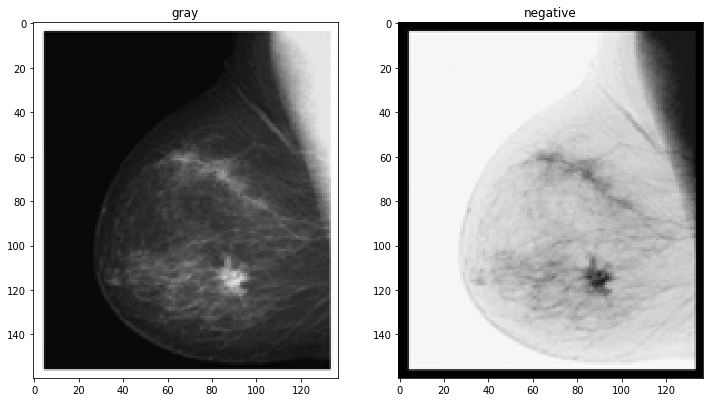

In [24]:
'''
1
Negative Transformation
'''
def negative(img):
    img2=255-img
    show_images([img,img2],["gray","negative"])
img = io.imread('imgs/Picture1.png')
img = rgb2gray(img)
negative(img)

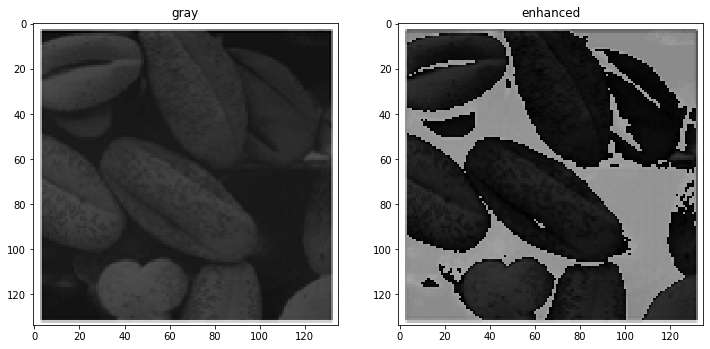

In [53]:
'''
2
Contrast Enhancement
'''
def CE(img):
    img2=np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img2[i][j]<=(100/256)):
                img2[i][j]=img2[i][j]*(1.5)+(50/256)
    show_images([img,img2],["gray","enhanced"])
img = io.imread('imgs/Picture2.png')
img = rgb2gray(img)
CE(img)

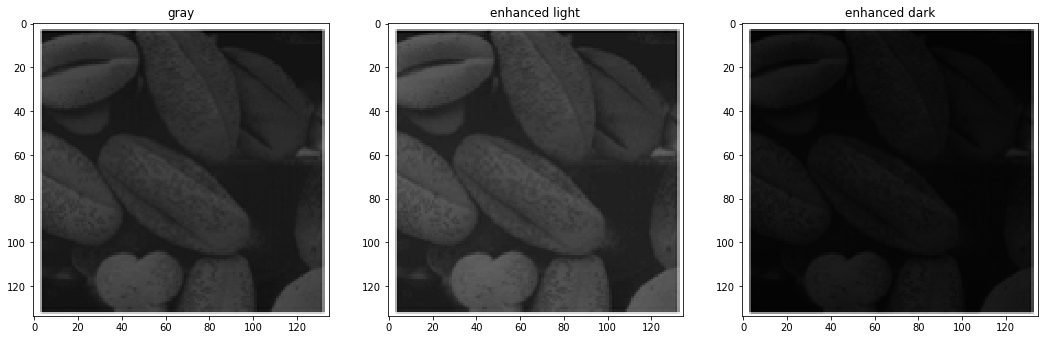

In [51]:
'''
3
Gamma Correction
'''
def gamma(img):
    img2 = np.power(img,0.5)
    img3 = np.power(img,3)
    show_images([img,img2,img3],["gray","enhanced light","enhanced dark"])
img = io.imread('imgs/Picture2.png')
img = rgb2gray(img)
gamma(img)

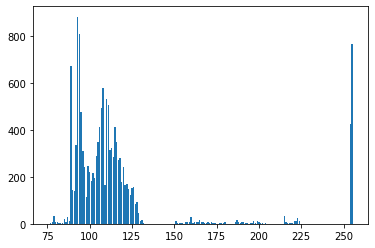

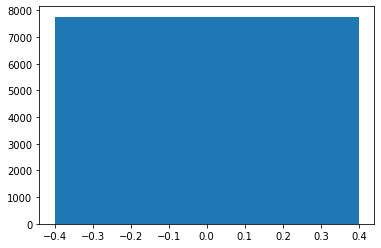

In [119]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name):
    showHist(name*256)
    hist=histogram(name)
    hist=np.array(hist[0])
    size=name.shape[0]*name.shape[1]
    hist = hist/(size)
    accum = np.copy(hist)
    for i in range(1,256):
        accum[i]=accum[i]+accum[i-1] 
    for i in range(name.shape[0]):
        for j in range(name.shape[1]):
            x=(int)(name[i][j]*255)
            name[i][j]=255*accum[x]/size
    showHist(name)        
img = io.imread('imgs/Picture2.png')
img = rgb2gray(img)
getImageWithHist(img)